In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [68]:
import pandas as pd
# C:/personal/Code/S6/NLP/Slang Classification/Datas/chatgpt_prelabel.csv
# C:/personal/Code/S6/NLP/Slang Classification/Datas/reduced_output.csv
# Load the CSV file
file_path = "C:/personal/Code/S6/NLP/Slang Classification/Datas/chatgpt_prelabel.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       6920 non-null   object
 1   Subreddit  6920 non-null   object
 2   Category   6920 non-null   object
dtypes: object(3)
memory usage: 162.3+ KB


(None,
                                                 Text  Subreddit  \
 0  this man is a cut above the rest outdoor or in...     soccer   
 1                                       why not four      funny   
 2                                          maga baby  AskReddit   
 3  i doubt even chatgpt would come up with a stor...     gaming   
 4  i feel thats kinda true but at the same time a...     soccer   
 
           Category  
 0         No Slang  
 1         No Slang  
 2  Offensive Slang  
 3         No Slang  
 4         No Slang  )

In [69]:
data = df.copy()
data.describe()

,Text,Subreddit,Category
count,6920,6920,6920
unique,6818,8,5
top,deleted,AskReddit,No Slang
freq,36,1458,4249


In [49]:
data.isnull().sum()

Text         0
Subreddit    0
label        0
dtype: int64

In [50]:
data.duplicated().sum()

50

In [44]:
data = data.dropna(subset=['Text'])

data = data.drop_duplicates()

In [45]:
# Remove outliers based on TextLength distribution
data["TextLength"] = data["Text"].apply(lambda x: len(x.split()))
lower_bound = data["TextLength"].quantile(0.01)
upper_bound = data["TextLength"].quantile(0.99)

data = data[(data["TextLength"] >= lower_bound) & 
                        (data["TextLength"] <= upper_bound)]

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6927 entries, 0 to 7099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        6927 non-null   object
 1   Subreddit   6927 non-null   object
 2   Category    6927 non-null   object
 3   TextLength  6927 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 270.6+ KB


In [28]:
data['TextLength'] = data['Text'].apply(len)

In [128]:
# lower_bound = data['TextLength'].quantile(0.01)
# upper_bound = data['TextLength'].quantile(0.99)

# data = data[(data['TextLength'] >= lower_bound) & (data['TextLength'] <= upper_bound)]

<Axes: >

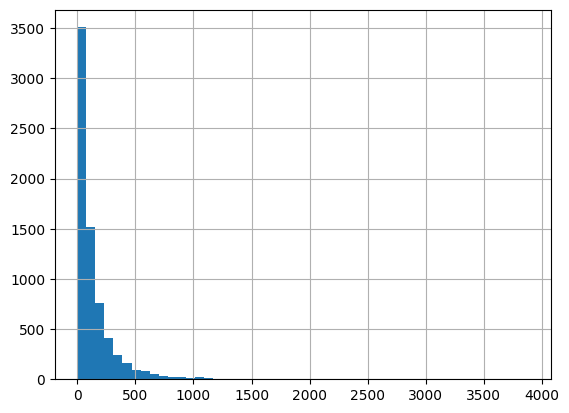

In [29]:
# Now apply the len() function safely
data['Text_length'] = data['Text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Visualize the distribution of text lengths
data['Text_length'].hist(bins=50)

<Axes: >

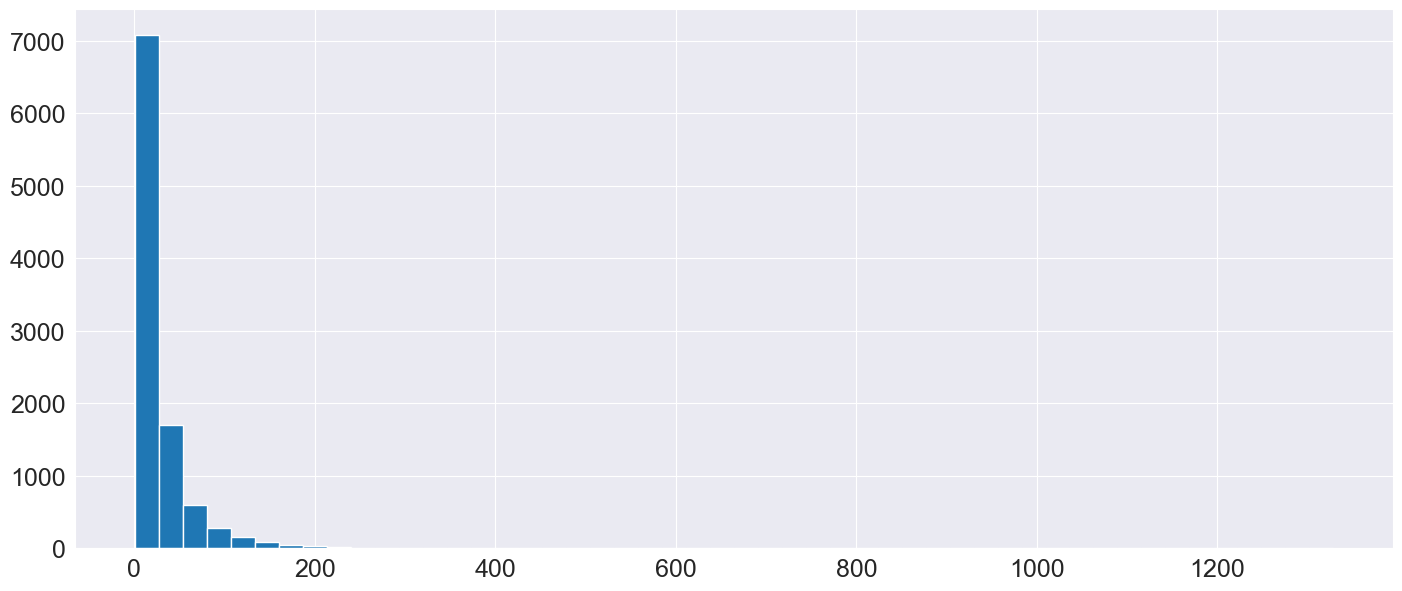

In [130]:
data['Word_count'] = data['Text'].apply(lambda x: len(x.split()))
data['Word_count'].hist(bins=50)


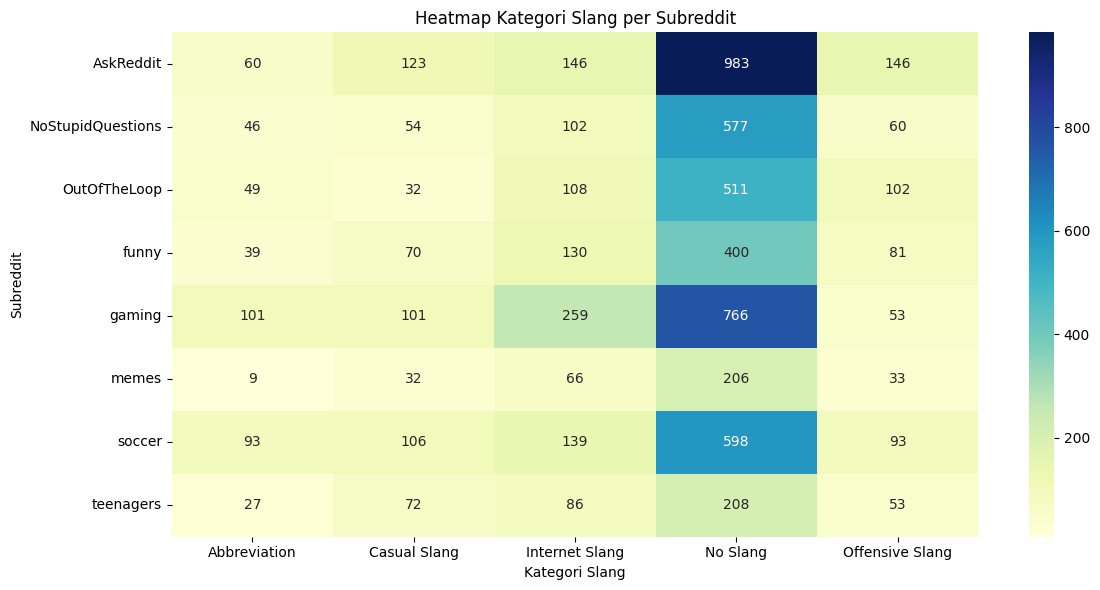

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot tabel: baris = subreddit, kolom = kategori, isi = jumlah
heatmap_data = data.pivot_table(
    index='Subreddit',
    columns='Category',
    aggfunc='size',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlGnBu")

plt.title("Heatmap Kategori Slang per Subreddit")
plt.xlabel("Kategori Slang")
plt.ylabel("Subreddit")
plt.tight_layout()
plt.show()


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # hapus URL
    text = re.sub(r"[^a-z\s]", "", text)  # hapus semua non-huruf
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

data["Cleaned_Text"] = data["Text"].apply(clean_text)

In [12]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

all_words = ' '.join(data['Cleaned_Text']).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)  # Top 20 most common words
common_words


[('like', 981),
 ('dont', 626),
 ('people', 620),
 ('one', 595),
 ('im', 535),
 ('get', 510),
 ('would', 484),
 ('game', 470),
 ('time', 458),
 ('think', 422),
 ('even', 402),
 ('good', 347),
 ('also', 340),
 ('thats', 334),
 ('know', 325),
 ('really', 321),
 ('still', 310),
 ('make', 308),
 ('much', 299),
 ('games', 295)]

C:\Users\andif\AppData\Local\Temp\ipykernel_17548\1471698888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(words), palette='viridis')


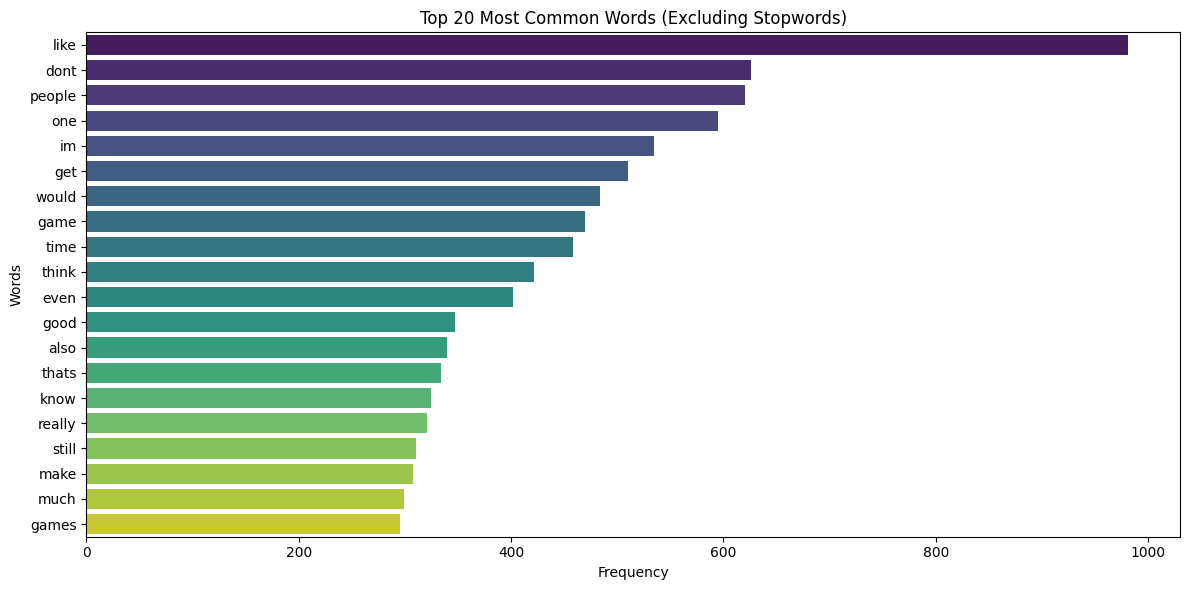

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unpack words and their frequencies
words, frequencies = zip(*common_words)

# Set plot style
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(words), palette='viridis')

# Add titles and labels
plt.title('Top 20 Most Common Words (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()

plt.show()



In [14]:
from nltk.util import ngrams
from collections import Counter
import nltk
nltk.download('punkt')

# Tokenize all text
all_tokens = nltk.word_tokenize(' '.join(data['Cleaned_Text']).lower())

# Remove stopwords and non-alphabetic tokens
filtered_tokens = [word for word in all_tokens if word.isalpha() and word not in stop_words]

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 2))

# Count bigram frequencies
bigram_freq = Counter(bigrams)
common_bigrams = bigram_freq.most_common(20)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
bigram_labels = [' '.join(bigram) for bigram, count in common_bigrams]
bigram_counts = [count for bigram, count in common_bigrams]

# Plot
plt.figure


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

C:\Users\andif\AppData\Local\Temp\ipykernel_17548\3965208071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_counts, y=bigram_labels, palette='magma')


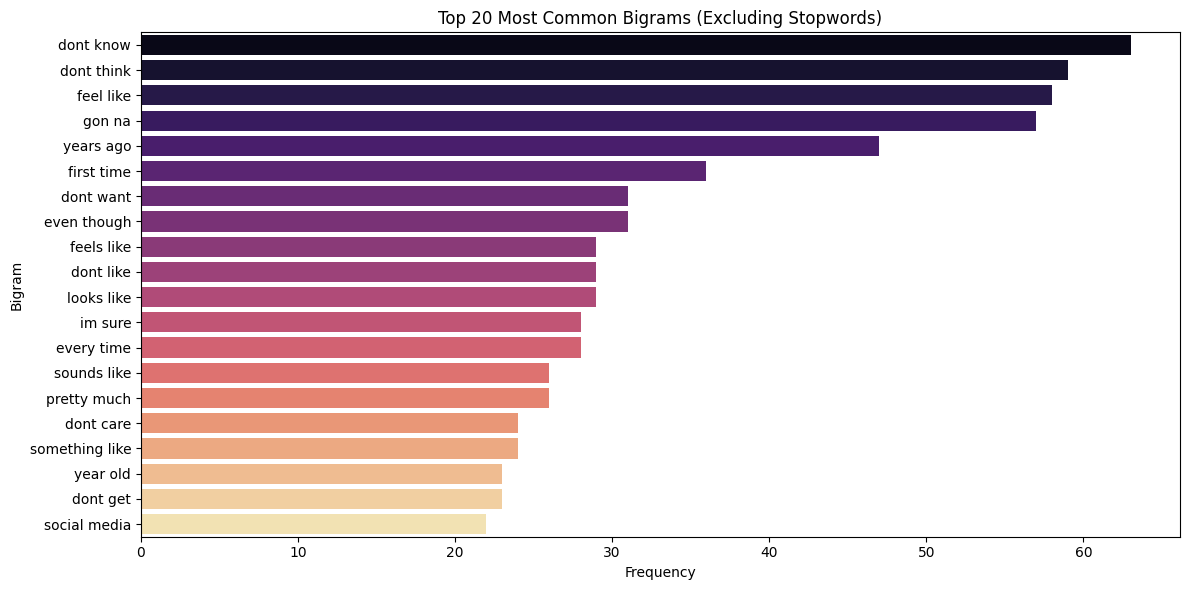

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_counts, y=bigram_labels, palette='magma')

plt.title('Top 20 Most Common Bigrams (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()  # <--- this is crucial to display the plot


<Axes: title={'center': 'Subreddit Distribution'}, xlabel='Subreddit'>

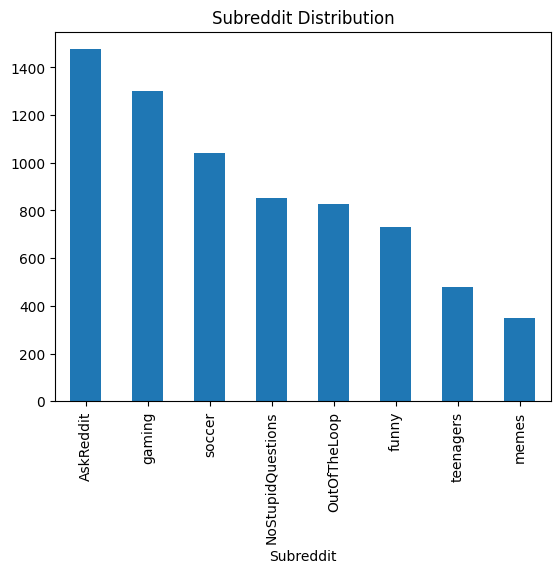

In [16]:
data['Subreddit'].value_counts().plot(kind='bar', title='Subreddit Distribution')

In [140]:
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
# Extract time-based features
data['Hour'] = data['Date'].dt.hour
data['DayOfWeek'] = data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year


<Axes: title={'center': 'Posts per Hour'}, xlabel='Hour'>

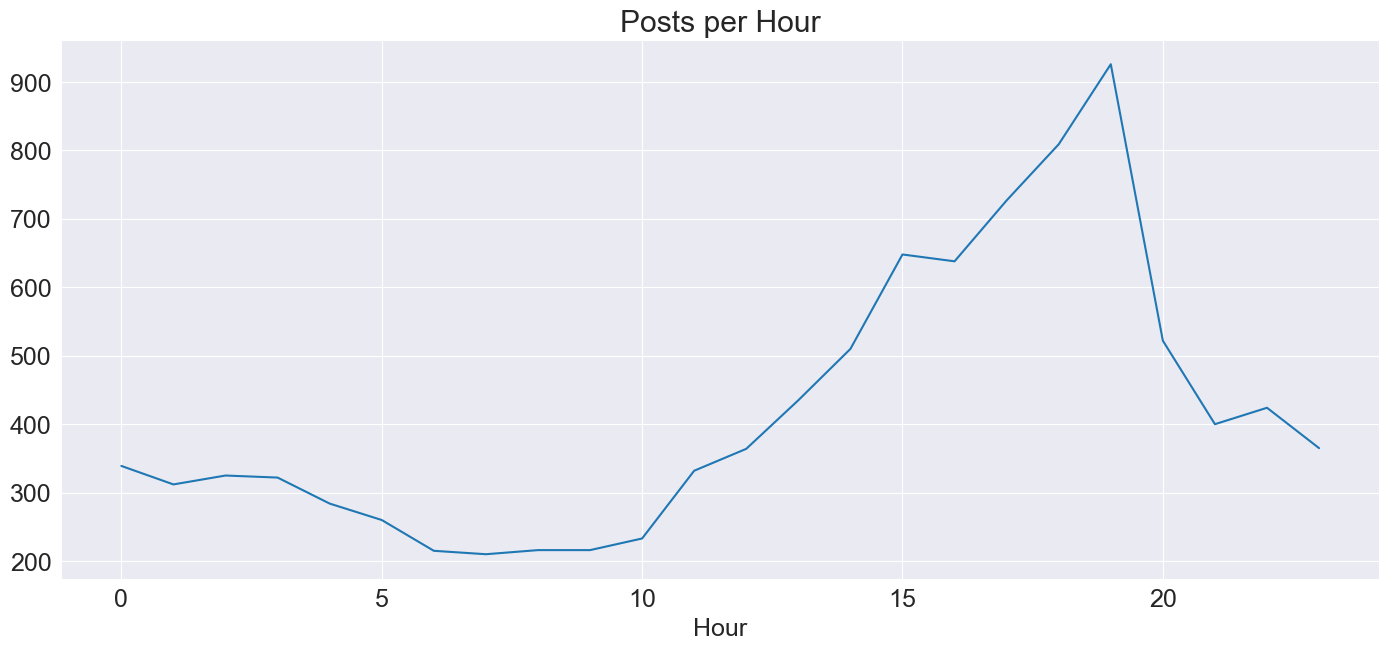

In [141]:
# Plot the distribution of posts by hour
data['Hour'].value_counts().sort_index().plot(kind='line', title='Posts per Hour')


<Axes: title={'center': 'Posts per Day of Week'}, xlabel='DayOfWeek'>

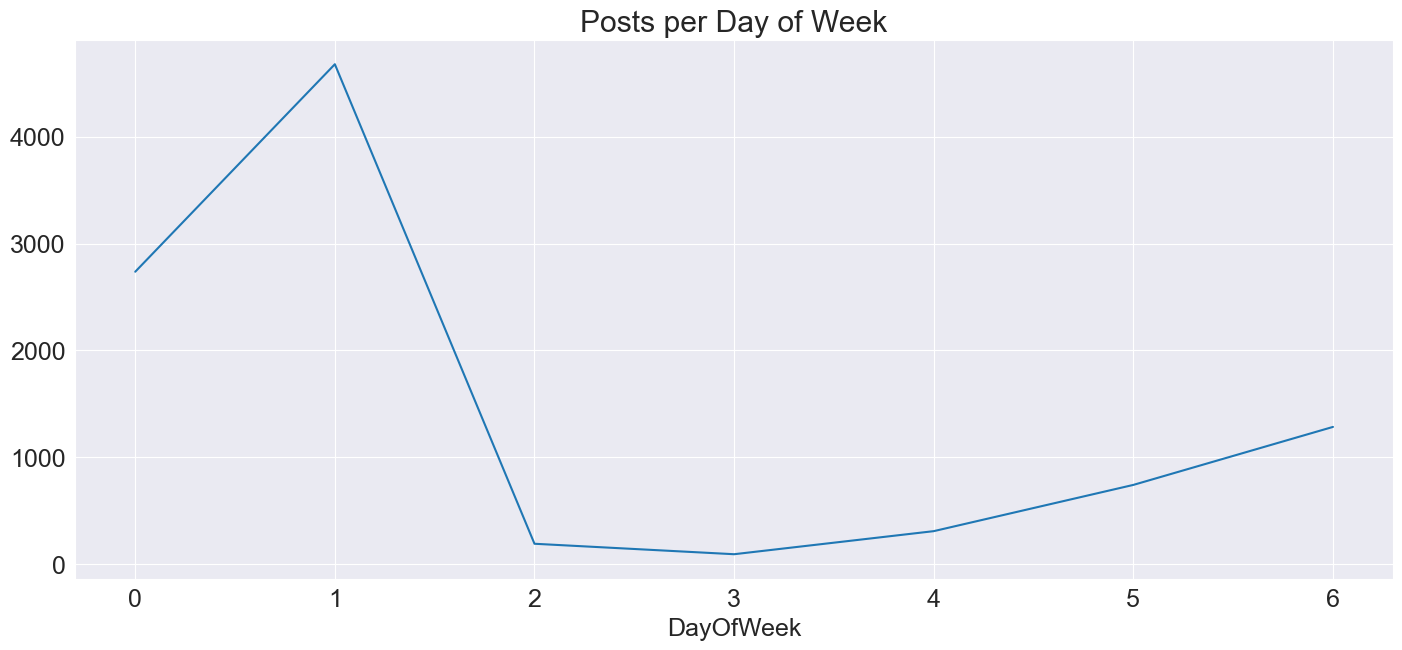

In [143]:
# Plot the distribution of posts by day of the week
data['DayOfWeek'].value_counts().sort_index().plot(kind='line', title='Posts per Day of Week')


<Axes: title={'center': 'Posts per Month'}, xlabel='Month'>

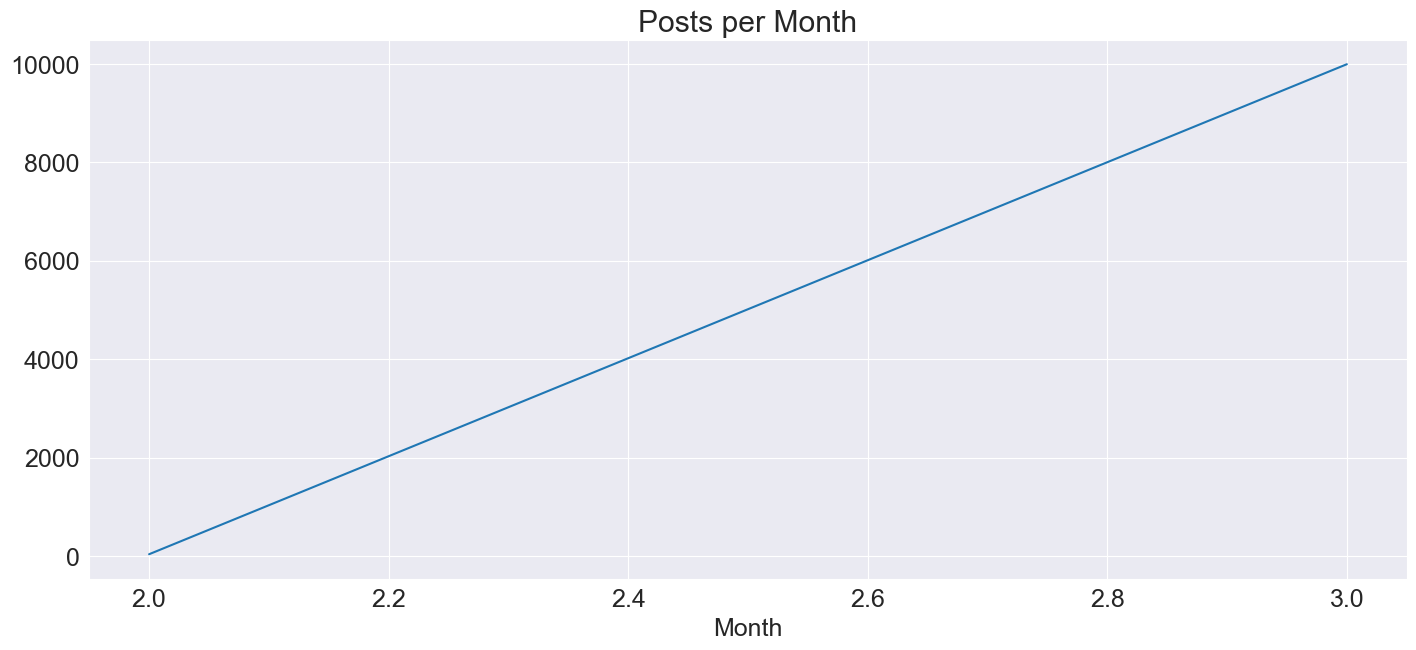

In [145]:
# Plot the distribution of posts by month
data['Month'].value_counts().sort_index().plot(kind='line', title='Posts per Month')